# Demographic Trends in the Netherlands

## 1 Imports and Loads

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Load Data

In [5]:
df_reg_codes = pd.read_csv("regions.csv")
df_reg_codes.head()

,Key,Title
0,NL01,Nederland
1,LD01,Northern Netherlands (LD)
2,LD02,Oost-Nederland (LD)
3,LD03,West-Nederland (LD)
4,LD04,Zuid-Nederland (LD)


In [6]:
df_housetype = pd.read_csv("house_type.csv")
df_housetype

,Key,Title,Description
0,T001100,Total,Single-family homes and multi-family homes total
1,ZW10290,Single-family home,Any dwelling that also forms a whole building....
2,ZW10340,Multi-family dwelling,Any dwelling that together with other living s...


In [7]:
df_house_region = pd.read_csv("numbers_regions.csv")
print(df_house_region.shape)
df_house_region.head()

(663, 4)


,House type,Regions,Periods,Initial Housing Stock
0,T001100,NL01,2012,7386743
1,T001100,NL01,2013,7449298
2,T001100,NL01,2014,7535316
3,T001100,NL01,2015,7587964
4,T001100,NL01,2016,7641323


In [8]:
df_population = pd.read_csv("population.csv", index_col = "ID")
df_population.head()

,Periods,PopulationAtStartOfSelectedPeriod_1,LiveBirths_2,Deaths_3,Immigration_4,EmigrationIncludingAdministrativeC_5,TotalPopulationGrowth_7,PopulationAtEndOfSelectedPeriod_8
ID,,,,,,,,
0,1995MM01,15424122,16436,11974,8362,6768,6056,15430178
1,1995MM02,15430178,14824,10106,6621,5341,5998,15436176
2,1995MM03,15436176,16205,12069,7596,5988,5744,15441920
3,1995MM04,15441920,14906,11412,6288,5490,4292,15446212
4,1995MM05,15446212,16167,11180,6672,5501,6158,15452370


## 2 Data Cleaning

In [10]:
#Strip spaces from object columns:
def strip_spaces(df):
    for column in df.columns:
        if df[column].dtype == "object":
            df[column] = df[column].str.strip()
    return df

#Convert:
df_reg_codes = strip_spaces(df_reg_codes)
df_housetype = strip_spaces(df_housetype)
df_house_region = strip_spaces(df_house_region)
df_population = strip_spaces(df_population)

In [11]:
#Are there NaN values:
print(df_reg_codes.isna().values.any())
print(df_housetype.isna().values.any())
print(df_house_region.isna().values.any())
print(df_population.isna().values.any())

False
False
False
False


## 3 Create Tables

In [13]:
#Merge Tables
COLUMN_NAMES = ({"Periods": "Year", "Initial Housing Stock": "Number of Houses", "Title_x": "Region", 
                "Title_y": "House Type", "Description": "House Desription"})

df_merged = pd.merge(df_house_region, df_reg_codes, how = "left", left_on = "Regions", right_on = "Key")
df_merged = pd.merge(df_merged , df_housetype, how = "left", left_on = "House type", right_on = "Key")
df_merged = df_merged[["Periods", "Initial Housing Stock", "Title_x", "Title_y", "Description"]].rename(columns = COLUMN_NAMES)
df_merged.head()

,Year,Number of Houses,Region,House Type,House Desription
0,2012,7386743,Nederland,Total,Single-family homes and multi-family homes total
1,2013,7449298,Nederland,Total,Single-family homes and multi-family homes total
2,2014,7535316,Nederland,Total,Single-family homes and multi-family homes total
3,2015,7587964,Nederland,Total,Single-family homes and multi-family homes total
4,2016,7641323,Nederland,Total,Single-family homes and multi-family homes total


In [14]:
#Seperate Country and Region
df_netherlands = df_merged[df_merged["Region"] == "Nederland"]
df_regions = df_merged.drop(df_netherlands.index)

#df_netherlands = df_netherlands.reset_index(drop = True)
df_regions = df_regions.reset_index(drop = True)

In [15]:
#Seperate Total and Types
#Country
df_neth_total = df_netherlands[df_netherlands["House Type"] == "Total"]
df_neth_types = df_netherlands.drop(df_neth_total.index)

df_neth_total = df_neth_total.reset_index(drop = True)
df_neth_types = df_neth_types.reset_index(drop = True)
#Region
df_reg_total = df_regions[df_regions["House Type"] == "Total"]
df_reg_types = df_regions.drop(df_reg_total.index)

df_reg_total = df_reg_total.reset_index(drop = True)
df_reg_types = df_reg_types.reset_index(drop = True)

In [16]:
#Exclude 2024 from the data
df_neth_total = df_neth_total.drop(df_neth_total.index[-1])
df_neth_types = df_neth_types.drop(df_neth_types.index[-1])
df_reg_total = df_reg_total.drop(df_reg_total.index[-1])
df_reg_types = df_reg_types.drop(df_reg_types.index[-1])

In [17]:
display(df_neth_total.head())
display(df_neth_types.head())
display(df_reg_total.head())
display(df_reg_types.head())

,Year,Number of Houses,Region,House Type,House Desription
0,2012,7386743,Nederland,Total,Single-family homes and multi-family homes total
1,2013,7449298,Nederland,Total,Single-family homes and multi-family homes total
2,2014,7535316,Nederland,Total,Single-family homes and multi-family homes total
3,2015,7587964,Nederland,Total,Single-family homes and multi-family homes total
4,2016,7641323,Nederland,Total,Single-family homes and multi-family homes total


,Year,Number of Houses,Region,House Type,House Desription
0,2012,4855858,Nederland,Single-family home,Any dwelling that also forms a whole building....
1,2013,4875461,Nederland,Single-family home,Any dwelling that also forms a whole building....
2,2014,4889114,Nederland,Single-family home,Any dwelling that also forms a whole building....
3,2015,4905957,Nederland,Single-family home,Any dwelling that also forms a whole building....
4,2016,4927588,Nederland,Single-family home,Any dwelling that also forms a whole building....


,Year,Number of Houses,Region,House Type,House Desription
0,2012,772104,Northern Netherlands (LD),Total,Single-family homes and multi-family homes total
1,2013,771736,Northern Netherlands (LD),Total,Single-family homes and multi-family homes total
2,2014,781292,Northern Netherlands (LD),Total,Single-family homes and multi-family homes total
3,2015,785326,Northern Netherlands (LD),Total,Single-family homes and multi-family homes total
4,2016,788884,Northern Netherlands (LD),Total,Single-family homes and multi-family homes total


,Year,Number of Houses,Region,House Type,House Desription
0,2012,600511,Northern Netherlands (LD),Single-family home,Any dwelling that also forms a whole building....
1,2013,598514,Northern Netherlands (LD),Single-family home,Any dwelling that also forms a whole building....
2,2014,598867,Northern Netherlands (LD),Single-family home,Any dwelling that also forms a whole building....
3,2015,599722,Northern Netherlands (LD),Single-family home,Any dwelling that also forms a whole building....
4,2016,600660,Northern Netherlands (LD),Single-family home,Any dwelling that also forms a whole building....


#### Population data

In [19]:
df_population["Periods"] = df_population["Periods"].str[:4].astype(int)
df_population = df_population.rename(columns = {"Periods": "Year"})

In [20]:
df_pop_final = df_population[(df_population["Year"] >= 2012) & (df_population["Year"] <= 2023)] #keeping the needed dates
df_pop_final = df_pop_final.rename(columns = {"PopulationAtStartOfSelectedPeriod_1": "Population"})
df_pop_final = df_pop_final[["Year", "Population"]]
df_pop_final = df_pop_final.groupby("Year").first().reset_index()

In [21]:
df_pop_final

,Year,Population
0,2012,16730348
1,2013,16779575
2,2014,16829289
3,2015,16900726
4,2016,16979120
5,2017,17081507
6,2018,17181084
7,2019,17282163
8,2020,17407585
9,2021,17475415


In [22]:
df_neth_total

,Year,Number of Houses,Region,House Type,House Desription
0,2012,7386743,Nederland,Total,Single-family homes and multi-family homes total
1,2013,7449298,Nederland,Total,Single-family homes and multi-family homes total
2,2014,7535316,Nederland,Total,Single-family homes and multi-family homes total
3,2015,7587964,Nederland,Total,Single-family homes and multi-family homes total
4,2016,7641323,Nederland,Total,Single-family homes and multi-family homes total
5,2017,7686178,Nederland,Total,Single-family homes and multi-family homes total
6,2018,7740984,Nederland,Total,Single-family homes and multi-family homes total
7,2019,7814912,Nederland,Total,Single-family homes and multi-family homes total
8,2020,7891786,Nederland,Total,Single-family homes and multi-family homes total
9,2021,7966331,Nederland,Total,Single-family homes and multi-family homes total


# 4 Graph population and housing data

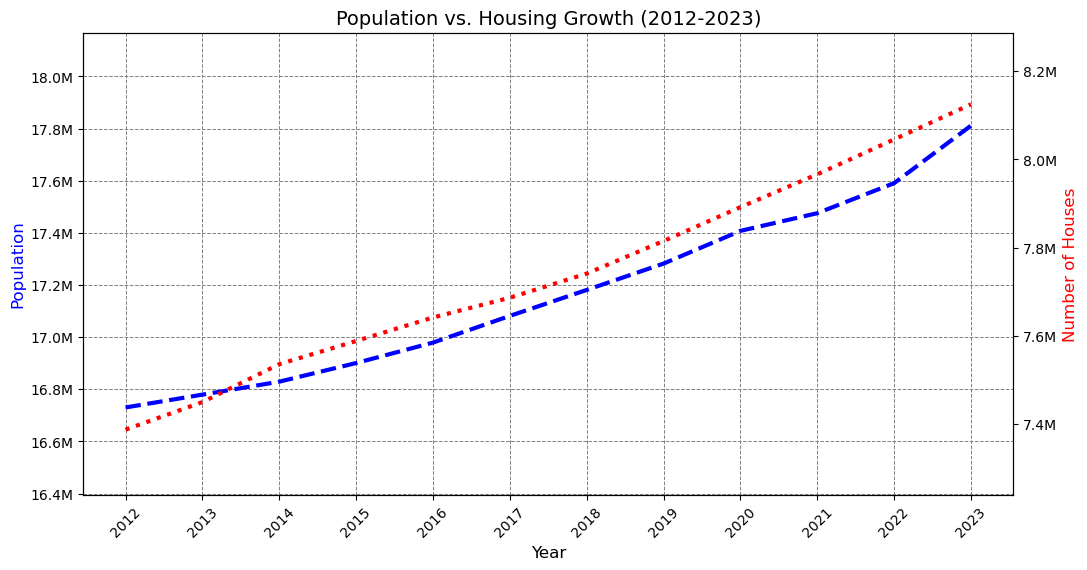

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

# First y-axis: Population
ax.plot(df_pop_final["Year"], df_pop_final["Population"], label="Population", color="blue", linestyle="--", linewidth = 3)
ax.set_ylabel("Population", fontsize=12, color="blue")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Scale first y-axis
ax.set_ylim(min(df_pop_final["Population"]) * 0.98, max(df_pop_final["Population"]) * 1.02)

# Create second y-axis
ax2 = ax.twinx()

# Second y-axis: Housing
ax2.plot(df_neth_total["Year"], df_neth_total["Number of Houses"], label="Housing", color="red", linestyle=":", linewidth = 3)
ax2.set_ylabel("Number of Houses", fontsize=12, color="red")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Scale second y-axis
ax2.set_ylim(min(df_neth_total["Number of Houses"]) * 0.98, max(df_neth_total["Number of Houses"]) * 1.02)

# Set x-axis labels
ax.set_xticks(df_pop_final["Year"])
plt.setp(ax.get_xticklabels(), rotation=45)

# Grid and background
ax.grid(color='grey', linestyle='--', linewidth=0.7)

# Titles
ax.set_title("Population vs. Housing Growth (2012-2023)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)

plt.show()

### Interactive chart

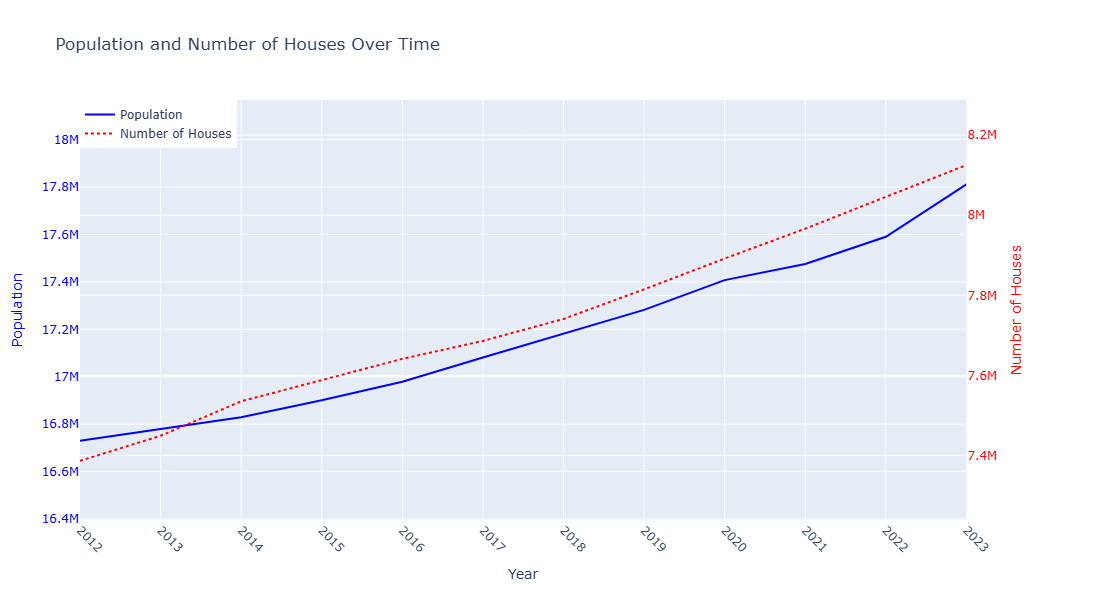

In [46]:
# Create figure with secondary Y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Population (Primary Y-Axis) - Blue Line
fig.add_trace(
    go.Scatter(
        x=df_pop_final["Year"], y=df_pop_final["Population"], 
        mode='lines', name="Population", line=dict(color='blue'),
    ),
    secondary_y=False
)

# Add Number of Houses (Secondary Y-Axis) - Red Line
fig.add_trace(
    go.Scatter(
        x=df_neth_total["Year"], y=df_neth_total["Number of Houses"], 
        mode='lines', name="Number of Houses", line=dict(color='red', dash='dot'),
    ),
    secondary_y=True
)

# Manually Set Y-Axis Ranges to Prevent Misleading Alignment
fig.update_yaxes(title_text="Population", title_font=dict(color="blue"), tickfont=dict(color="blue"), 
                 range=[df_pop_final["Population"].min() * 0.98, df_pop_final["Population"].max() * 1.02], 
                 secondary_y=False)

fig.update_yaxes(title_text="Number of Houses", title_font=dict(color="red"), tickfont=dict(color="red"), 
                 range=[df_neth_total["Number of Houses"].min() * 0.98, df_neth_total["Number of Houses"].max() * 1.02], 
                 secondary_y=True)

# Show every year & rotate labels
fig.update_xaxes(
    tickmode="linear",  # Ensures every year is shown
    tickangle=45,  # Rotates labels by 45 degrees
    dtick=1,  # Ensures tick interval is 1 year
    title_text="Year"
)

# Add Titles and Labels
fig.update_layout(
    title_text="Population and Number of Houses Over Time",
    xaxis_title="Year",
    legend=dict(x=0, y=1),
    height = 600
)


# Show plot
fig.show()